In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import optim
from torch.utils.data import DataLoader

from torchvision.transforms import transforms
import torchvision.datasets as datasets

from models import U_Net_big

from RectifiedFlow import RectifiedFlow_Unet, train_rectified_flow_Unet_cond2

In [2]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(device)

cuda


In [3]:
batch_size = 512

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
    ])

train_dataset = datasets.MNIST(
    "./data",
    download=True,
    train=True,
    transform=transform,
)

train_dataset.data = train_dataset.data[np.isin(train_dataset.targets, [1,4])]
train_dataset.targets = train_dataset.targets[np.isin(train_dataset.targets, [1,4])]

test_dataset = datasets.MNIST(
    "./data",
    download=True,
    train=False,
    transform=transform,
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
)

input_shape = (batch_size, 2, 32, 32)

In [4]:
v_model_1 = U_Net_big(input_shape=input_shape, output_channels=1)
rectified_flow_1 = RectifiedFlow_Unet(v_model_1, device)

In [5]:
optimizer_1 = torch.optim.Adam(rectified_flow_1.v_model.parameters(), lr=5e-3)
# optim.beta1 = 0.9
# optim.eps = 1e-8
#optimizer_1 = torch.optim.SGD(rectified_flow_1.v_model.parameters(), lr=5e-3, momentum=0.99)
scheduler_1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer_1, factor=0.8, patience=80, verbose=True)

In [14]:
rectified_flow_1 = train_rectified_flow_Unet_cond2(rectified_flow_1, optimizer_1, scheduler_1, train_dataloader, device, epochs=30, noise_factor=0.005)

Epoch 00926: reducing learning rate of group 0 to 3.2000e-03.
Epoch 01007: reducing learning rate of group 0 to 2.5600e-03.
Epoch 01088: reducing learning rate of group 0 to 2.0480e-03.
Epoch 01169: reducing learning rate of group 0 to 1.6384e-03.
Epoch 01250: reducing learning rate of group 0 to 1.3107e-03.
Epoch 01331: reducing learning rate of group 0 to 1.0486e-03.
Epoch 01444: reducing learning rate of group 0 to 8.3886e-04.


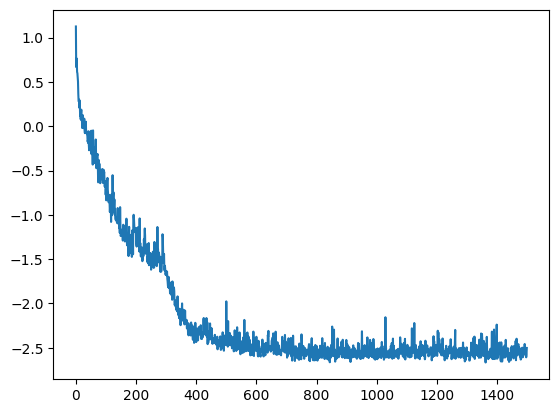

In [16]:
plt.plot(np.log(rectified_flow_1.loss_curve))
plt.show()

In [17]:
torch.save(rectified_flow_1, "./models/MNIST/MNIST_1a4cond2_Unet_big_flow1.pth")

In [4]:
rectified_flow_1 = torch.load("./models/MNIST/MNIST_1a4cond2_Unet_big_flow1.pth")

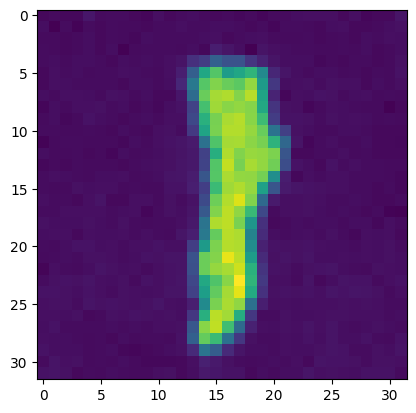

tensor([[[[-1.0288, -1.0117, -1.0310,  ..., -1.0168, -1.0233, -0.9415],
          [-0.9924, -1.0838, -1.0036,  ..., -1.0112, -0.9964, -0.9770],
          [-1.0106, -1.0079, -1.0192,  ..., -1.0007, -0.9803, -0.9879],
          ...,
          [-0.9634, -0.9895, -0.9894,  ..., -0.9695, -0.9898, -0.9573],
          [-1.0096, -0.9551, -0.9805,  ..., -0.9778, -0.9733, -0.9830],
          [-0.9622, -0.9576, -0.9776,  ..., -0.9644, -0.9607, -1.0079]]],


        [[[-1.0094, -1.0175, -1.0011,  ..., -1.0221, -0.9842, -1.0080],
          [-1.0325, -1.0519, -1.0151,  ..., -0.9850, -1.0213, -1.0109],
          [-1.0479, -1.0217, -1.0092,  ..., -0.9637, -0.9893, -0.9677],
          ...,
          [-0.9987, -0.9762, -0.9914,  ..., -0.9997, -1.0029, -1.0260],
          [-0.9828, -0.9781, -0.9958,  ..., -1.0003, -1.0107, -0.9938],
          [-0.9557, -0.9920, -0.9787,  ..., -1.0151, -0.9826, -1.0353]]],


        [[[-1.0605, -1.0084, -1.0195,  ..., -0.9990, -0.9929, -0.9841],
          [-1.0348, -1.007

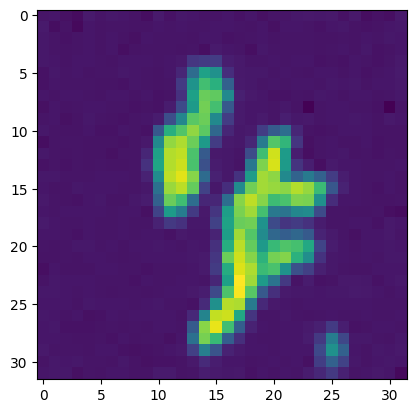

tensor([[[[-1.0120, -1.0083, -1.0410,  ..., -1.0361, -1.0512, -0.9805],
          [-0.9744, -1.0619, -1.0239,  ..., -1.0246, -1.0068, -0.9974],
          [-0.9920, -1.0163, -1.0301,  ..., -1.0144, -0.9945, -1.0056],
          ...,
          [-0.9837, -1.0102, -1.0100,  ..., -0.9962, -1.0085, -0.9889],
          [-1.0254, -0.9923, -1.0022,  ..., -1.0012, -0.9987, -1.0076],
          [-1.0049, -0.9952, -0.9952,  ..., -0.9864, -1.0012, -1.0906]]],


        [[[-1.0103, -1.0165, -1.0082,  ..., -1.0522, -1.0037, -1.0542],
          [-1.0263, -1.0489, -1.0265,  ..., -1.0039, -1.0353, -1.0373],
          [-1.0381, -1.0281, -1.0157,  ..., -0.9892, -1.0053, -0.9930],
          ...,
          [-1.0169, -1.0004, -1.0128,  ..., -1.0052, -1.0132, -1.0395],
          [-1.0048, -1.0031, -1.0193,  ..., -1.0060, -1.0127, -1.0071],
          [-0.9912, -1.0180, -0.9920,  ..., -1.0257, -1.0052, -1.1162]]],


        [[[-1.0592, -1.0065, -1.0223,  ..., -1.0183, -1.0077, -1.0025],
          [-1.0272, -1.008

In [11]:
rectified_flow_1.v_model.eval()
img_init = torch.randn(20,1,32,32).to(device)

labels = torch.tensor([1 for i in range(20)]).to(device)
img = rectified_flow_1.sample_ode(img_init * 0.5 +1, 100)
plt.imshow(img[-1][0, 0].detach().cpu().numpy())
plt.show()
#print(np.mean(img[-1].detach().cpu().numpy()))
print(img[-1])

labels = torch.tensor([0 for i in range(20)]).to(device)
img = rectified_flow_1.sample_ode(img_init * 0.5 -1, 100)
plt.imshow(img[-1][0, 0].detach().cpu().numpy())
plt.show()
#print(np.mean(img[-1].detach().cpu().numpy()))
print(img[-1])

[]

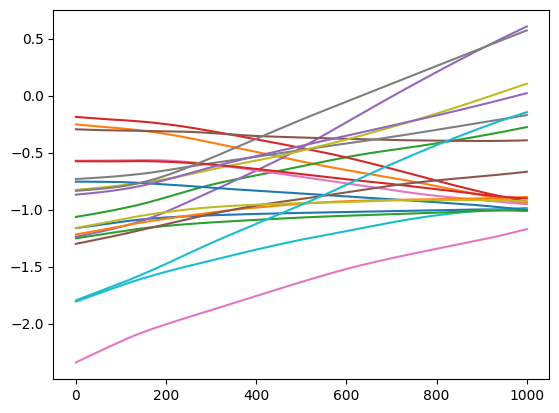

In [21]:
s = torch.zeros(20,len(img),1,32,32)
for i in range(len(img)):
    s[:,i] = img[i]
for i in range(20):
    plt.plot(s[i,:,0,15,15].cpu().numpy())
plt.plot()

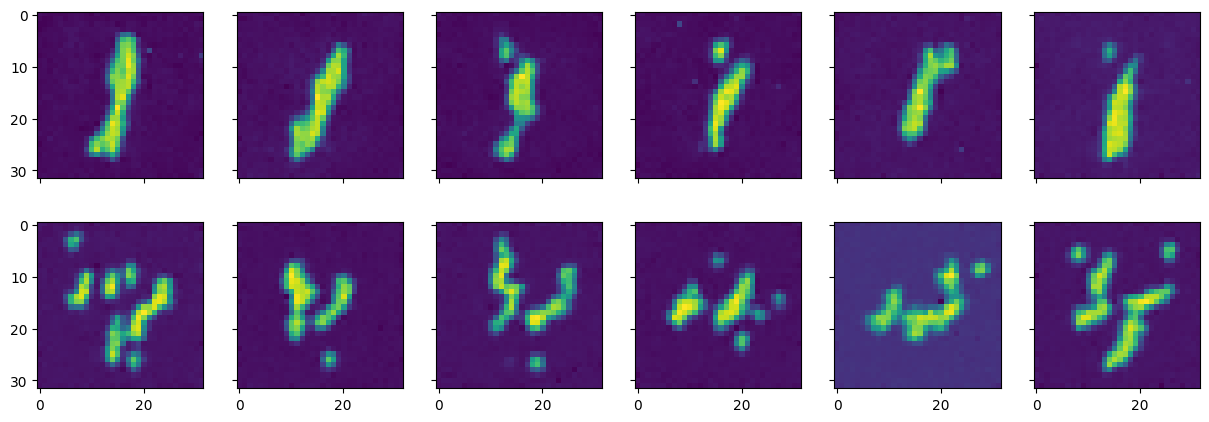

In [22]:
rows = 2
columns = 6
size = (15, 5)
fig, ax = plt.subplots(rows, columns, figsize=(size), sharex=True, sharey=True)


for column in range(columns):
    img_init = torch.randn(1,1,32,32).to(device)

    labels = torch.tensor([0]).to(device)
    img = rectified_flow_1.sample_ode(img_init * 0.5 +1, 300)[-1][0,0].detach().cpu().numpy()
    ax[0, column].imshow(img)

    labels = torch.tensor([1]).to(device)
    img = rectified_flow_1.sample_ode(img_init * 0.5 -1, 300)[-1][0,0].detach().cpu().numpy()
    ax[1, column].imshow(img)

plt.show()

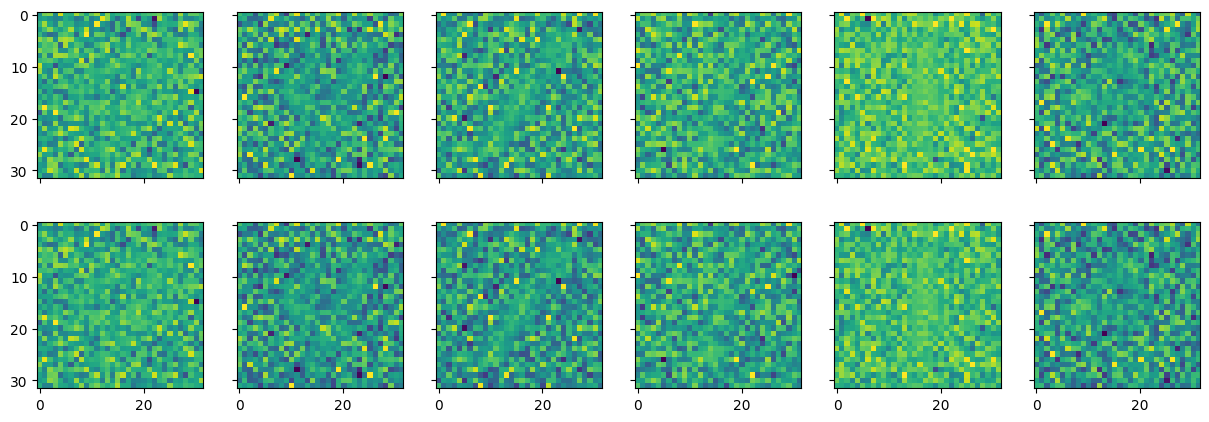

In [8]:
rows = 2
columns = 6
size = (15, 5)
fig, ax = plt.subplots(rows, columns, figsize=(size), sharex=True, sharey=True)


for column in range(columns):
    for batch in train_dataloader:
        batch,_ = batch
        img_init = batch[:1].reshape(1,1,32,32).to(device) + (torch.randn(1,1,32,32).to(device) * 0.01) - (torch.randn(1,1,32,32).to(device) * 0.01)
        break

    labels = torch.tensor([0]).to(device)
    img = rectified_flow_1.reverse_sample_ode_cond(img_init, labels, 100)[-1][0,0].detach().cpu().numpy()
    ax[0, column].imshow(img)

    labels = torch.tensor([1]).to(device)
    img = rectified_flow_1.reverse_sample_ode_cond(img_init, labels, 100)[-1][0,0].detach().cpu().numpy()
    ax[1, column].imshow(img)

plt.show()

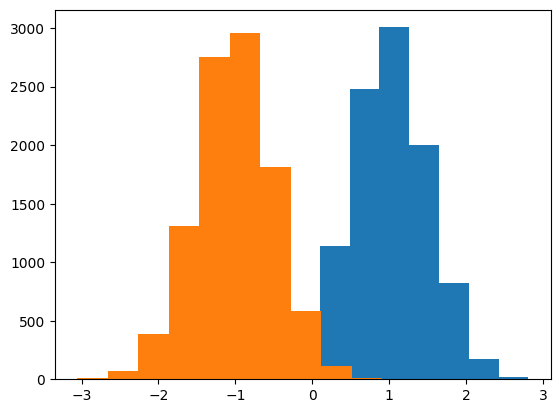

In [26]:
plt.hist(torch.randn(10000).numpy() * 0.5 +1)
plt.hist(torch.randn(10000).numpy() *0.5 -1)
plt.show()

In [22]:
samples_init = torch.randn(2000,1,32,32).to(device) / 3 # do this sampeling in batches ?
flow_1 = rectified_flow_1.sample_ode(samples_init, 100)

RuntimeError: CUDA out of memory. Tried to allocate 500.00 MiB (GPU 0; 7.79 GiB total capacity; 4.95 GiB already allocated; 84.75 MiB free; 6.17 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
v_model_2 = U_Net(input_shape=input_shape, output_channels=1, initial_lr=5e-3, momentum=0.9, weight_decay=0.0)
rectified_flow_2 = RectifiedFlow_Unet(v_model_2, device)

In [ ]:
optimizer_2 = torch.optim.Adam(rectified_flow_2.v_model.parameters(), lr=5e-3)
# optim.beta1 = 0.9
# optim.eps = 1e-8
#optimizer_1 = torch.optim.SGD(rectified_flow_1.v_model.parameters(), lr=5e-3, momentum=0.99)
scheduler_2 = optim.lr_scheduler.ReduceLROnPlateau(optimizer_2, factor=0.8, patience=80, verbose=True)

In [ ]:
rectified_flow_2 = train_rectified_flow_Unet(rectified_flow_2, optimizer_2, scheduler_2, train_dataloader, device, epochs=60)

Epoch 00551: reducing learning rate of group 0 to 4.0000e-03.
Epoch 00652: reducing learning rate of group 0 to 3.2000e-03.
Epoch 00763: reducing learning rate of group 0 to 2.5600e-03.
Epoch 00880: reducing learning rate of group 0 to 2.0480e-03.
Epoch 00961: reducing learning rate of group 0 to 1.6384e-03.
Epoch 01042: reducing learning rate of group 0 to 1.3107e-03.
Epoch 01123: reducing learning rate of group 0 to 1.0486e-03.
Epoch 01278: reducing learning rate of group 0 to 8.3886e-04.
Epoch 01359: reducing learning rate of group 0 to 6.7109e-04.
Epoch 01440: reducing learning rate of group 0 to 5.3687e-04.
Epoch 01521: reducing learning rate of group 0 to 4.2950e-04.
Epoch 01602: reducing learning rate of group 0 to 3.4360e-04.
Epoch 01683: reducing learning rate of group 0 to 2.7488e-04.
Epoch 01764: reducing learning rate of group 0 to 2.1990e-04.
Epoch 01930: reducing learning rate of group 0 to 1.7592e-04.
Epoch 02011: reducing learning rate of group 0 to 1.4074e-04.
Epoch 02

In [ ]:
torch.save(rectified_flow_2, "./models/MNIST_newest_ref1.pth")

In [ ]:
rectified_flow_2 = torch.load("./models/MNIST_newest_ref1.pth")

tensor([[[[-0.9930, -1.0088, -1.0064,  ..., -1.0125, -1.0055, -0.9762],
          [-0.9936, -0.9874, -0.9879,  ..., -0.9942, -0.9839, -1.0150],
          [-0.9848, -0.9936, -0.9995,  ..., -0.9833, -1.0040, -0.9976],
          ...,
          [-0.9899, -1.0035, -1.0079,  ..., -1.0005, -0.9994, -0.9871],
          [-0.9933, -1.0009, -1.0023,  ..., -0.9963, -0.9966, -0.9948],
          [-0.9997, -1.0072, -1.0046,  ..., -0.9992, -0.9983, -0.9899]]],


        [[[-0.9801, -1.0077, -1.0098,  ..., -0.9986, -0.9884, -0.9866],
          [-0.9902, -0.9904, -1.0030,  ..., -1.0046, -0.9851, -0.9800],
          [-0.9845, -0.9931, -0.9984,  ..., -1.0118, -0.9973, -0.9819],
          ...,
          [-0.9918, -1.0022, -0.9894,  ..., -1.0016, -1.0048, -0.9975],
          [-0.9836, -0.9842, -0.9955,  ..., -1.0058, -1.0158, -0.9897],
          [-0.9819, -0.9891, -1.0031,  ..., -0.9978, -1.0025, -0.9883]]],


        [[[-0.9782, -1.0020, -0.9904,  ..., -1.0117, -0.9884, -0.9851],
          [-0.9910, -1.013

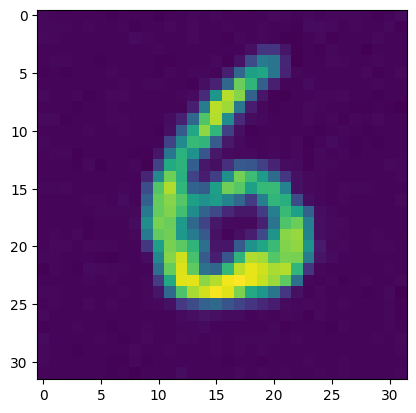

In [ ]:
rectified_flow_2.v_model.eval()
img_init = torch.randn(20,1,32,32).to(device) / 3

img = rectified_flow_2.sample_ode(img_init, 3)

print(img[-1])

plt.imshow(img[-1][0, 0].detach().cpu().numpy())
plt.show()

[]

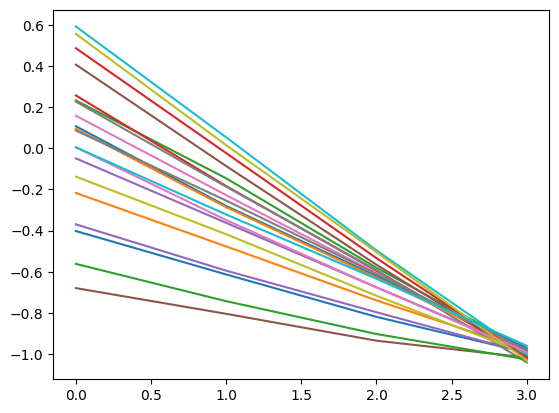

In [ ]:
s = torch.zeros(20,len(img),1,32,32)
for i in range(len(img)):
    s[:,i] = img[i]
for i in range(20):
    plt.plot(s[i,:,0,0,0].cpu().numpy())
plt.plot()

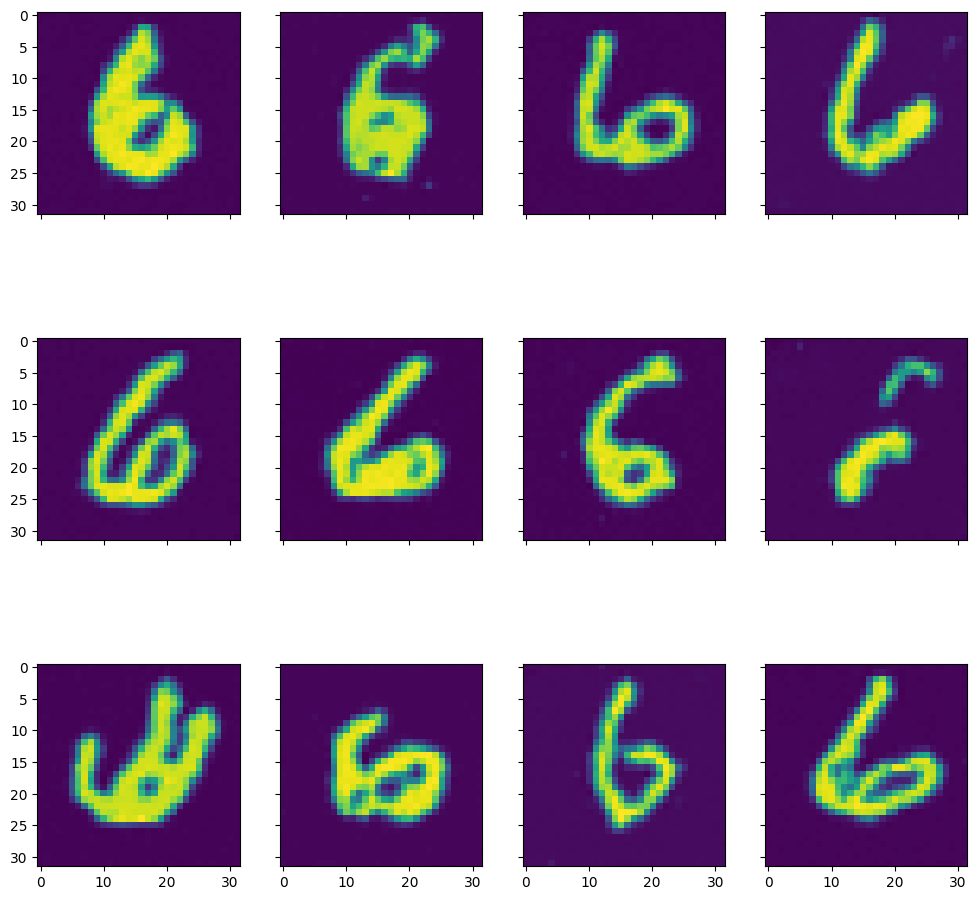

In [ ]:
rows = 3
columns = 4
size = (12, 12)
fig, ax = plt.subplots(rows, columns, figsize=(size), sharex=True, sharey=True)

for row in range(rows):
    for column in range(columns):
        img_init = torch.randn(1,1,32,32).to(device) / 3

        img = rectified_flow_2.sample_ode(img_init, 100)[-1][0,0].detach().cpu().numpy()
        ax[row, column].imshow(img)

plt.show()

In [ ]:
def show_trajectories(rectified_flow):
    rectified